In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#Let us first remove some unnecessary columns
df.drop(columns=['area_type', 'availability', 'society'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [4]:
df.dropna(inplace=True)
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [5]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [6]:
df['bhk']=df['size'].apply(lambda x: int(x.split(' ')[0]))
df.drop(columns='size', inplace=True)
df.bhk.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [7]:
df[df.bhk>20]
#probably erroneous entries

,location,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


In [8]:
df.total_sqft.unique()
#we see some values like '1133 - 1384' , we have to deal with them 
#lets replace them with the avergae of two values

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [9]:
#caluculating price per sqft
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2  #return the average
    try:
        return float(x)
    except:
        return None  

In [10]:
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)
df = df[df.total_sqft.notnull()]
df.head(2)

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4


In [11]:
#Feature Engineering
#adding new feature called price per square feet

In [12]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [13]:
# Examine locations which is a categorical variable. We need to apply dimensionality 
# reduction technique here to reduce number of locations

df.location.value_counts()

Whitefield           513
Sarjapur  Road       372
Electronic City      300
Kanakpura Road       259
Thanisandra          230
                    ... 
S R Layout             1
Meenakshi Layout       1
Vidyapeeta             1
Maruthi Extension      1
Abshot Layout          1
Name: location, Length: 1259, dtype: int64

In [14]:
len(df.location.value_counts()[df.location.value_counts()>10])

235

In [15]:
#lets replace the locations less than 10 with others
print(df.location.value_counts()[df.location.value_counts()<10].index)
loc_list=df.location.value_counts()[df.location.value_counts()<10].index
df.location=df.location.apply(lambda x:'other' if x in loc_list else x)
df.location.nunique()

Index(['5th Block Hbr Layout', 'Kamakshipalya', 'B Narayanapura',
       'Kaverappa Layout', 'Lingarajapuram', 'Banagiri Nagar',
       '2nd Phase JP Nagar', 'Chandra Layout', 'KUDLU MAIN ROAD',
       'Dodsworth Layout',
       ...
       'Subbannaiah Palya', 'whitefiled', 'Medi Agrahara', 'Sadduguntepalya',
       'Shirdi Sai Nagar', 'S R Layout', 'Meenakshi Layout', 'Vidyapeeta',
       'Maruthi Extension', 'Abshot Layout'],
      dtype='object', length=1012)


248

In [16]:
df.head(7)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275


As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft. 

In [17]:
#removing outliers by business logic
print(df.shape)
df=df[df.total_sqft/df.bhk >300]
df.shape

(12668, 7)


(11847, 7)

In [18]:
#removing outliers using std deviation and mean
df1=df.copy()

In [19]:
df1.price_per_sqft.describe()

count     11847.000000
mean       6122.582987
std        3895.257533
min         267.829813
25%        4187.716982
50%        5227.272727
75%        6750.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [20]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df2 = remove_pps_outliers(df1)
df2.shape

(9655, 7)

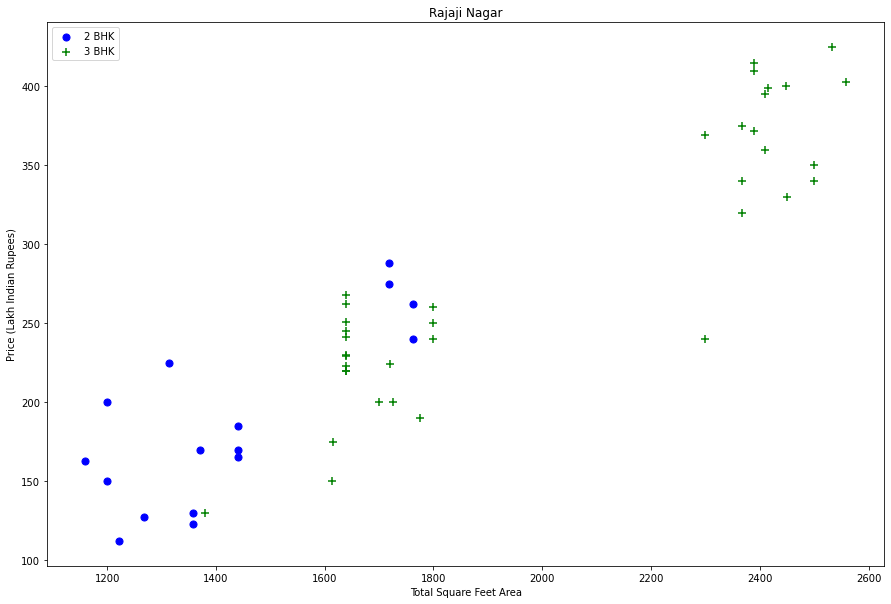

In [21]:
# lets check how the prices of 2 and 3 bhk varie given a particular location
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df2,"Rajaji Nagar")

In [22]:
#Now we can remove those 2 BHK apartments whose 
#price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df2 = remove_bhk_outliers(df2)
# df8 = df7.copy()
df2.shape

(6948, 7)

In [23]:
# It is unusual to have 2 more bathrooms than number of bedrooms in a home
df2[df2.bath>df2.bhk+2]

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1523,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6394,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
7999,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [24]:
df3=df2[df2.bath<df2.bhk+2]
df3.shape

(6884, 7)

In [25]:
df3=df3.drop(columns=['price_per_sqft'])
df3.head()

,location,total_sqft,bath,balcony,price,bhk
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2


In [26]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
dummy=pd.get_dummies(df3.location)
dummy.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df4=pd.concat([df3, dummy.drop('other', axis=1)], axis=1)
df4.head()

,location,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df4.drop(['location','balcony'], axis=1, inplace=True)
df4.head(3)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#model building
df4.shape

(6884, 251)

In [30]:
X=df4.drop('price', axis=1)
X.shape

(6884, 250)

In [31]:
y=df4.price
y.head(3)

1    40.0
2    83.0
3    40.0
Name: price, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5507, 250), (1377, 250), (5507,), (1377,))

In [33]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.7728053941623787

In [34]:
# Use K Fold cross validation to measure accuracy of our LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.78674043, 0.8682417 , 0.86292649, 0.80046779, 0.87676797])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

Find best model using grid search CV

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model_selection(X,y):
    algo_names={
        'linear_reg':{
            'model':LinearRegression(),
            'params':{'normalize':[True, False]
                     }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best', 'random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_names,config in algo_names.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_names,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])
best_model_selection(X,y)

,model,best_score,best_params
0,linear_reg,0.839029,{'normalize': True}
1,lasso,0.715242,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.710627,"{'criterion': 'mse', 'splitter': 'best'}"


Based on the results we can say that Linear Regression gives the best results. therefore , we will condier that model.

Test the model for few properties

In [42]:
def predict_price(location, sqft, bath, bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]

In [43]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

81.02850603100296

In [44]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

76.76714744355205

In [45]:
predict_price('Indira Nagar',1000, 2, 2)

154.4848820753767

In [46]:
predict_price('Indira Nagar',1000, 3, 3)

150.2235234879258

Import the model to the pickel file

In [47]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [48]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))